In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import skimage
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.transform import resize
from sklearn.utils.multiclass import unique_labels
import random
from sklearn.ensemble import RandomForestClassifier
import skimage.io

In [0]:
PATH_TRAIN_IM = "/content/train_im/"
PATH_TRAIN_LD = "/content/train_ld/dataset_landmasks_auto_5600/"
PATH_VALID_IM = "/content/valid_im/dataset_valid/"
PATH_VALID_LD = "/content/valid_ld/dataset_landmasks_valid/"
PATH_CSV = "/content/csv/csv/"

In [0]:
def download_and_unzip(filename, target_folder="dataset") -> str:
    if filename[-4:] != ".zip": filename += ".zip"
    url = "http://yucanwu.com/aps360/" + filename

    !cd /content/
    !rm -rf unzip_temp
    !mkdir -p unzip_temp
    !wget $url
    !unzip -qq $filename -d unzip_temp/
    !rm -rf $target_folder
    !mkdir -p $target_folder
    !mv unzip_temp/* $target_folder

    return "/content/" + target_folder + "/"

!rm -rf /content/*
PATH_TRAIN_IM = download_and_unzip("set_a_5600", "train_im")
PATH_TRAIN_LD = download_and_unzip("set_al_5600", "train_ld") + "dataset_landmasks_auto_5600/"

PATH_VALID_IM = download_and_unzip("set_v_3500", "valid_im") + "dataset_valid/"
PATH_VALID_LD = download_and_unzip("set_vl_3500", "valid_ld") + "dataset_landmasks_valid/"

--2020-03-20 16:14:59--  http://yucanwu.com/aps360/set_a_5600.zip
Resolving yucanwu.com (yucanwu.com)... 207.148.19.24
Connecting to yucanwu.com (yucanwu.com)|207.148.19.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92874999 (89M) [application/zip]
Saving to: ‘set_a_5600.zip’

set_a_5600.zip      100%[===================>]  88.57M   121MB/s    in 0.7s    

2020-03-20 16:15:00 (121 MB/s) - ‘set_a_5600.zip’ saved [92874999/92874999]

--2020-03-20 16:15:06--  http://yucanwu.com/aps360/set_al_5600.zip
Resolving yucanwu.com (yucanwu.com)... 207.148.19.24
Connecting to yucanwu.com (yucanwu.com)|207.148.19.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40966359 (39M) [application/zip]
Saving to: ‘set_al_5600.zip’

set_al_5600.zip     100%[===================>]  39.07M  90.0MB/s    in 0.4s    

2020-03-20 16:15:07 (90.0 MB/s) - ‘set_al_5600.zip’ saved [40966359/40966359]

--2020-03-20 16:15:13--  http://yucanwu.com/aps360/set_v_3500.zi

In [0]:
def load_image_files(path_to_dir, dimension=(64, 64)):
    image_dir = Path(path_to_dir)
    folders = [dir for dir in image_dir.iterdir() if dir.is_dir()]
    categories = [f.name for f in folders]

    descr = "imgae dataset categorized"
    target = []
    flat_data = []
    images = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [0]:
train_set = load_image_files(PATH_TRAIN_IM)

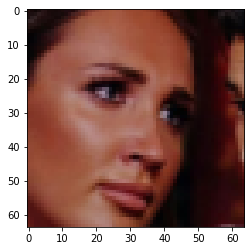

In [0]:
#print(train_set)
img = train_set['images'][1700]
#print(img)
imgplot = plt.imshow(img)

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(
# train_set.data, train_set.target, test_size=0.4,random_state=999)

# X_train, X_test, y_train, y_test = train_test_split(
#     train_set.data, train_set.target, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.25, random_state=1)
X_train = train_set.data
y_train = train_set.target

In [0]:

#clf = svm.SVC(C = 100, cache_size=7000, kernel = 'linear')
#clf = svm.LinearSVR(C = 100, random_state = 0)

#param_grid = [
#    {'C': [1, 10, 100, 1000]},
# ]

#clf = GridSearchCV(svc, param_grid)
#clf.fit(X_train, y_train)
#clf.fit(X_train, y_train)


In [0]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_jobs=2, random_state=99, n_estimators = 1000)
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [0]:
test_set = load_image_files(PATH_VALID_IM)
X_test = test_set.data
y_test = test_set.target

Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=False, random_state=99, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.27      0.24      0.26       500
           1       0.24      0.18      0.21       500
           2       0.27      0.37      0.31       500
           3       0.29      0.21      0.24       500
           4       0.29      0.35      0.32       500
           5       0.38      0.29      0.33       500
           6       0.46      0.58      0

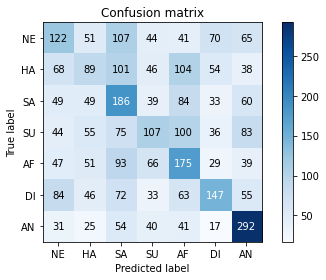

In [0]:
y_pred = rdf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (rdf, metrics.classification_report(y_test, y_pred)))

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    return ax

class_names = ['','NE','HA','SA','SU','AF','DI','AN']
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')
plt.savefig('confusion_matrix_baseline.png')
plt.show()


Afraid = NE
Angry = HA
Disgust = SA
Happy = SU
Neutral = AF
Sad = DI
Surprise = AN
Actual (predicted)


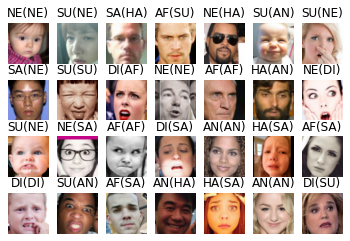

In [0]:
#new_test = load_image_files("base_img/val")
#imgplot = plt.imshow(new_test['images'][0])
prediction = rdf.predict(X_test)
emotion = ['Afraid', 'Angry', 'Disgust', 'Happy', 'Neutral', 'Sad', 'Surprise']
abbr = ['NE','HA','SA','SU','AF','DI','AN']
for i in range(len(emotion)):
    print(emotion[i] + " = " + abbr[i])
print("Actual (predicted)")
k = 0
c = 4
r = 7
rand_list = random.sample(range(len(y_test)), r*c)
for i in rand_list:
    plt.subplot(c, r, k+1)
    plt.title(abbr[y_test[i]] + "(" + abbr[prediction[i]]+ ")")
    plt.axis('off')
    x_copy = X_test[i]
    plt.imshow(x_copy.reshape(64,64,3))
    k+=1
plt.savefig('result_baseline.png')

In [0]:
new_test = load_image_files("base_img/new_test")
#imgplot = plt.imshow(new_test['images'][0])
prediction = rdf.predict((new_test.data))
#print(new_test)
emotion = ['Afraid', 'Angry', 'Disgust', 'Happy', 'Neutral', 'Sad', 'Surprise']
abbr = ['AF','AN','DI', 'HA','NE','SA','SU']
for i in range(len(emotion)):
    print(emotion[i] + " = " + abbr[i])

print("Actual (predicted)")
#print(len(new_test['images']))
for i in range(len(new_test['images'])):
    plt.subplot(1, 5, i+1)
    plt.title(new_test.target_names[new_test.target[i]] + "(" + abbr[prediction[i]]+ ")")
    plt.axis('off')
    plt.imshow(new_test['images'][i])